In [1]:
using Images, Colors

In [2]:
imgSize = 400

400

In [3]:
r = imgSize/2

200.0

In [4]:
runs = 200

200

In [5]:
function xtorgb(x)
    
    #Three color values are set to 0 by default
    red = 0
    blue = 0
    green = 0
    
    #Determines the green color
    if x <= -1
        green = 255
    elseif x > -1 && x < 0
        green = -x*255
    elseif x >= 0 && x <= 2
        green = 0
    elseif x > 2 && x <= 3
        green = (x-2)*255
    elseif x > 3
        green = 255
    end
               
    #Determines the red color
    if x <= -2
        red = 255
    elseif x > -2 && x < -1
        red = (2+x)*255
    elseif x >= -1 && x <= 1
        red = 255
    elseif x > 1 && x < 2
        red = (2-x)*255
    elseif x >= 2
        red = 0
    end
                                    
    #Determines the blue color
    if x <= -3
        blue = 255
    elseif x >=-3 && x <= -2
        blue = (-x-2)*255
    elseif x >= -2 && x <= 0
        blue = 0
    elseif x > 0 && x < 1
        blue = x*255
    elseif x >= 1
        blue = 255
    end
                                                    
    return [red; green; blue]
end

xtorgb (generic function with 1 method)

In [6]:
xtorgb(1.235)

3-element Array{Float64,1}:
 195.075
   0.0  
 255.0  

In [7]:
valArray = 6*rand(imgSize,imgSize).-3;

In [8]:
rgbArray = zeros(3,imgSize,imgSize);

In [9]:
for i = 1:imgSize
    for j = 1:imgSize
        rgbArray[:,i,j] = xtorgb(valArray[i,j])
    end
end

rgbArray;

In [10]:
colorview(RGB, rgbArray / 255);

In [11]:
function picture(plane)
    resolutioni = size(plane)[1]
    resolutionj = size(plane)[2]
    white = [255.0; 255.0; 255.0]
    p = zeros(3, resolutioni, resolutionj)
    
    for i1 = 1:resolutioni
        line = zeros(3, resolutioni)
        
        for j1 = 1:resolutionj
            i = real.(plane[i1,j1])
            j = imag.(plane[i1,j1])
            a = xtorgb(3*atan(i,j)/pi)
            d = sqrt(i^2 + j^2)
            
            if d < 1
                c = white*(1-d)+d*a
            else
                c = a/d
            end
                
            for l = 1:3
                if c[l] < 0.0
                    c[l] = 0.0
                elseif c[l] > 255.0
                    c[l] = 255.0
                end
            end
                    
            line[:,j1] = c
        end
        
        p[:,:,i1] = line
    end
            
    return p
end    

picture (generic function with 1 method)

In [12]:
p = picture(valArray);

In [13]:
colorview(RGB, p / 255);

In [14]:
function f(x)
    return x^5 - x + 1
end

f (generic function with 1 method)

In [15]:
function df(x)
    return 5x^4 - 1
end

df (generic function with 1 method)

In [16]:
function newton(x)
    return x - f(x)/df(x)
end

newton (generic function with 1 method)

In [17]:
function steffensen(x)
    z = f(x)
    t5 = x^2
    t6 = t5^2
    t33 = x*(1+x*(1+x*(1+x*(1+x*(4+x*(3+x*(2+x*(1+t5*(6+
         x*(3+x*(1+t5*x*(4+x*(t6+1)))))))))))))
    if t33 == 0
        println("zero")
        return x
    end
    return x-z/t33
end

steffensen (generic function with 1 method)

In [18]:
tmpa = transpose(2*collect(-r:r-1)/r);

In [19]:
tmpb = ones(1,imgSize);

In [20]:
plane = (transpose(tmpa)*tmpb)*1im;

In [21]:
plane = plane + (transpose(tmpb)*tmpa);

In [22]:
pictureArray = zeros(imgSize, imgSize, runs)*0im;

In [23]:
newPlane = zeros(imgSize, imgSize)*0im;

In [24]:
for i = 1:runs
    resolutioni = size(plane)[1]
    resolutionj = size(plane)[2]
    
    for i1 = 1:resolutioni
        for j1 = 1:resolutionj
            newPlane[i1,j1] = newton(plane[i1,j1])
        end
    end
    
    plane = newPlane
    
    pictureArray[:,:,i] = newPlane
end

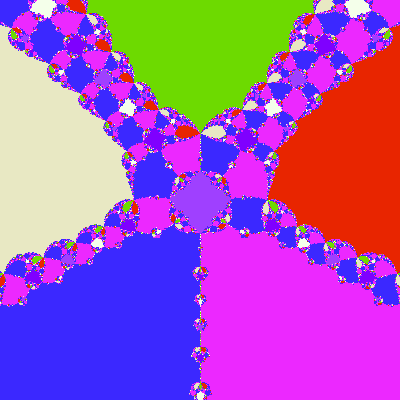

In [25]:
colorview(RGB, picture(pictureArray[:,:,runs]) / 255)